In [1]:
import torch
import torch.nn.functional as F

In [2]:
# Prepare dataset
x_data = torch.Tensor([[1.0],[2.0],[3.0]])
y_data = torch.Tensor([[0],[0],[1]])


In [3]:
# Design model using class
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1,1)
        
        
    def forward(self,x):
        y_pred = F.sigmoid(self.linear(x))
        return y_pred

In [4]:
model = LogisticRegressionModel()

In [5]:
# Construct optimizer and loss
optimizer  = torch.optim.SGD(model.parameters(),lr=0.01)
criterion = torch.nn.BCELoss(size_average=False)

D:\application\Anaconda\envs\pytorch\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [8]:
# Train cycle
for epoch in range(1000):
    # Predict
    y_pred = model(x_data)
#     print(y_pred)
    # Compute loss
    loss = criterion(y_pred,y_data)
    print(epoch, loss.item())
    
    # Clear gradient
    optimizer.zero_grad()
    # Backpropogate
    loss.backward()
    # Update
    optimizer.step()
    

D:\application\Anaconda\envs\pytorch\lib\site-packages\torch\nn\functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


0 1.6621617078781128
1 1.6607952117919922
2 1.6594312191009521
3 1.6580692529678345
4 1.6567094326019287
5 1.6553521156311035
6 1.6539974212646484
7 1.6526446342468262
8 1.651294231414795
9 1.6499460935592651
10 1.6486003398895264
11 1.647256851196289
12 1.6459157466888428
13 1.6445765495300293
14 1.6432397365570068
15 1.6419053077697754
16 1.6405727863311768
17 1.6392428874969482
18 1.6379151344299316
19 1.6365896463394165
20 1.6352661848068237
21 1.6339452266693115
22 1.6326262950897217
23 1.6313097476959229
24 1.629995346069336
25 1.6286829710006714
26 1.6273729801177979
27 1.6260650157928467
28 1.6247591972351074
29 1.6234560012817383
30 1.622154712677002
31 1.6208555698394775
32 1.619558572769165
33 1.618263840675354
34 1.6169712543487549
35 1.6156809329986572
36 1.6143925189971924
37 1.6131064891815186
38 1.6118226051330566
39 1.6105406284332275
40 1.6092607975006104
41 1.6079833507537842
42 1.6067079305648804
43 1.6054346561431885
44 1.604163408279419
45 1.6028943061828613
46 1.

378 1.2745133638381958
379 1.2737518548965454
380 1.2729912996292114
381 1.272231936454773
382 1.2714734077453613
383 1.2707159519195557
384 1.2699596881866455
385 1.2692044973373413
386 1.2684502601623535
387 1.2676968574523926
388 1.2669446468353271
389 1.2661936283111572
390 1.2654436826705933
391 1.2646945714950562
392 1.263946533203125
393 1.2631996870040894
394 1.2624534368515015
395 1.2617087364196777
396 1.2609646320343018
397 1.2602219581604004
398 1.2594799995422363
399 1.2587392330169678
400 1.2579995393753052
401 1.2572606801986694
402 1.2565226554870605
403 1.2557859420776367
404 1.2550503015518188
405 1.2543154954910278
406 1.2535817623138428
407 1.2528488636016846
408 1.252117395401001
409 1.2513864040374756
410 1.2506568431854248
411 1.2499278783798218
412 1.2491999864578247
413 1.2484732866287231
414 1.2477474212646484
415 1.2470226287841797
416 1.2462990283966064
417 1.245576024055481
418 1.2448539733886719
419 1.2441332340240479
420 1.2434133291244507
421 1.242694377

762 1.0438227653503418
763 1.0433498620986938
764 1.042877197265625
765 1.0424052476882935
766 1.0419337749481201
767 1.0414628982543945
768 1.040992259979248
769 1.040522575378418
770 1.040053129196167
771 1.0395840406417847
772 1.0391157865524292
773 1.0386478900909424
774 1.0381805896759033
775 1.037713646888733
776 1.0372473001480103
777 1.0367814302444458
778 1.036316156387329
779 1.035851240158081
780 1.0353869199752808
781 1.0349233150482178
782 1.0344600677490234
783 1.0339971780776978
784 1.0335350036621094
785 1.0330729484558105
786 1.032611608505249
787 1.0321511030197144
788 1.0316908359527588
789 1.0312310457229614
790 1.0307717323303223
791 1.0303128957748413
792 1.029854655265808
793 1.029396891593933
794 1.0289396047592163
795 1.0284829139709473
796 1.0280265808105469
797 1.0275708436965942
798 1.0271153450012207
799 1.0266605615615845
800 1.0262062549591064
801 1.0257524251937866
802 1.0252991914749146
803 1.0248463153839111
804 1.024393916130066
805 1.0239421129226685

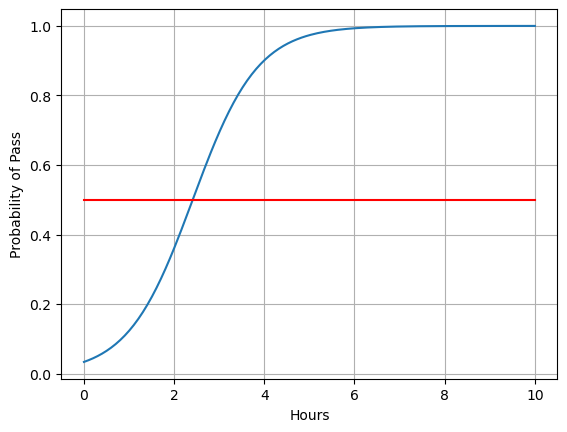

In [9]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 10, 200)
x_t = torch.Tensor(x).view((200, 1))
y_t = model(x_t)
y = y_t.data.numpy()
plt.plot(x, y)
plt.plot([0, 10], [0.5, 0.5], c='r')
plt.xlabel('Hours')
plt.ylabel('Probability of Pass')
plt.grid()
plt.show()
